In [1]:
# Core Imports
import numpy as np
from utils.data import getClassifierData
from utils.reporter import ModelEvaluationHarness
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV


# Implementation Specific Imports
from sklearn.naive_bayes import GaussianNB as Classifier


In [2]:
preppedData, preppedTarget = getClassifierData()


accuracy :
 0.5286666666666666
precision :
 0.5177556949610467
recall :
 0.8471553577376086
f1 :
 0.6427078308409713
classificationReport :
               precision    recall  f1-score   support

       False       0.58      0.21      0.31     32973
        True       0.52      0.85      0.64     33027

    accuracy                           0.53     66000
   macro avg       0.55      0.53      0.48     66000
weighted avg       0.55      0.53      0.48     66000

confusionMatrix :
 [[ 6913 26060]
 [ 5048 27979]]
roc_curve :
 {'fpr': array([0.        , 0.79034361, 1.        ]), 'tpr': array([0.        , 0.84715536, 1.        ]), 'thresholds': array([inf,  1.,  0.])}
auc :
 0.5284058716325808


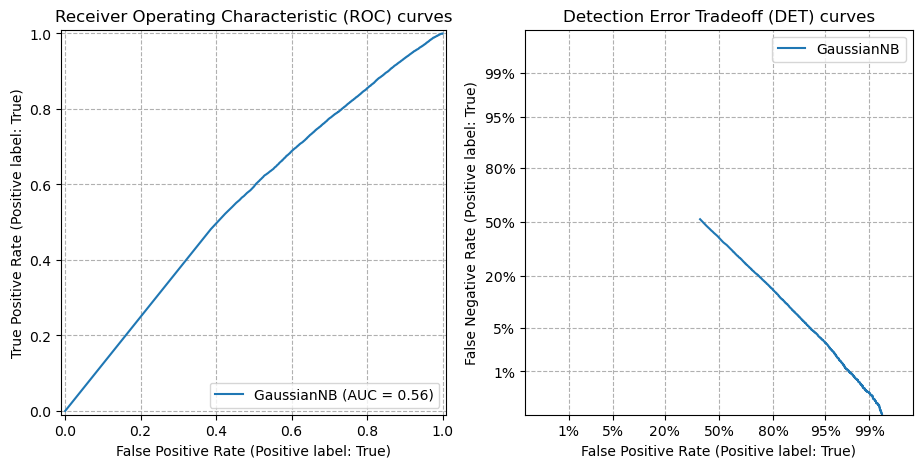

In [3]:
defaultModel = ModelEvaluationHarness(
    Classifier(),
    Classifier.__name__,
    preppedData,
    preppedTarget
    )

defaultModel.splitData()
defaultModel.train()
defaultModel.predict()
defaultModel.evaluate()
defaultModel.graphROC()
for valuation, value in defaultModel.evaluation.items():
    print(valuation ,':\n', value)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 10 is smaller than n_iter=10000. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/naive_bayes.py:511: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/naive_bayes.py:511: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * se

accuracy :
 0.5611969696969697
precision :
 0.5609266362982498
recall :
 0.5667181397038786
f1 :
 0.5638075156261767
classificationReport :
               precision    recall  f1-score   support

       False       0.56      0.56      0.56     32973
        True       0.56      0.57      0.56     33027

    accuracy                           0.56     66000
   macro avg       0.56      0.56      0.56     66000
weighted avg       0.56      0.56      0.56     66000

confusionMatrix :
 [[18322 14651]
 [14310 18717]]
roc_curve :
 {'fpr': array([0.        , 0.44433324, 1.        ]), 'tpr': array([0.        , 0.56671814, 1.        ]), 'thresholds': array([inf,  1.,  0.])}
auc :
 0.5611924486770385


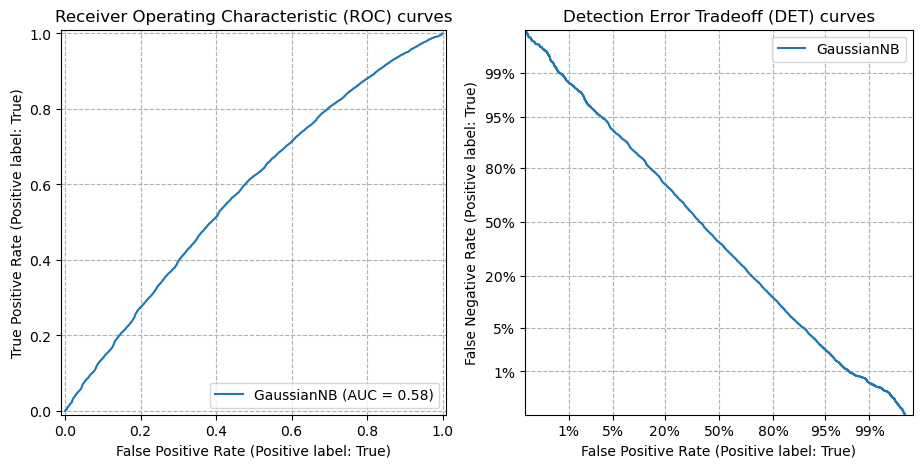

In [4]:
param_bounds= {
            'var_smoothing': list(np.arange(0.0,1.0,0.1)),
        }

"""Identify Optimal Configuration"""
search = HalvingRandomSearchCV(Classifier(), param_bounds)
search = search.fit(preppedData, preppedTarget)


"""Harness Classifier with Optimal Configuration"""
tuned_evaluator = ModelEvaluationHarness(
    Classifier(**search.best_estimator_.get_params()),
    Classifier.__name__,
    preppedData,
    preppedTarget
)

"""Evaluate Model"""
tuned_evaluator.splitData()
tuned_evaluator.train()
tuned_evaluator.predict()
tuned_evaluator.evaluate()
tuned_evaluator.graphROC()
for valuation, value in tuned_evaluator.evaluation.items():
    print(valuation ,':\n', value)